<h1> RFE feature selection method</h1>

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
from timeit import default_timer
warnings.filterwarnings('ignore')

In [2]:
df_preprocessed = pd.read_excel("game_reviews_preprocessed.xlsx", index_col=0)

In [3]:
df_preprocessed

,review,voted_up
37439,zeskalowanie świat tracić niemal zupełnie sens...,False
1414,totalny dno kolejka hdodanie serwer wcale nie ...,False
12728,dobra typ gracz nudzić samotny biegać kopalnia...,True
11891,fajny poczuć pikselowym świat otoczyć szlam zo...,True
20635,raz zaczynać sezon niepotrzebny stres niepotrz...,False
...,...,...
37771,tył czas zmarnować internet cholerstwo nie chc...,False
73100,skórka cena gem tragedia dobierać gracz meczeć...,False
4761,ciągły wywalać kolejka kolejka kompania gracz ...,False
41470,naprawdę nieudany postać sporo tył odblokować ...,False


In [4]:
df_preprocessed.drop_duplicates(subset=['review'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['voted_up'], test_size=0.3, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
tfidf_tokens = vectorizer.get_feature_names()

print(X_train.shape)
X_train = pd.DataFrame(X_train.toarray(), columns=tfidf_tokens)
X_train.head()

(2554, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_test = vectorizer.transform(X_test)
# tfidf_tokens = vectorizer.get_feature_names()

print(X_test.shape)
X_test = pd.DataFrame(X_test.toarray(), columns=tfidf_tokens)
X_test.head()

(1095, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
estimator = LogisticRegression()

In [8]:
all_k = [i for i in range(500, 3000, 500)]
all_selectors = []

for k in all_k:
    print(f"> Fitting RFE selector for {k} features")
    selector = RFE(estimator, n_features_to_select=k, step=20000)
    selector = selector.fit(X_train, y_train)
    all_selectors.append(selector)

> Fitting RFE selector for 500 features
> Fitting RFE selector for 1000 features
> Fitting RFE selector for 1500 features
> Fitting RFE selector for 2000 features
> Fitting RFE selector for 2500 features


<h3> MultinomialNB </h3>

> Training and evaluating MultinomialNB model for 1 selector with 500 features
0.0013433000001441542
> Training and evaluating MultinomialNB model for 2 selector with 1000 features
0.0029504999999971915
> Training and evaluating MultinomialNB model for 3 selector with 1500 features
0.004464899999902627
> Training and evaluating MultinomialNB model for 4 selector with 2000 features
0.004413200000044526
> Training and evaluating MultinomialNB model for 5 selector with 2500 features
0.005387400000017806
Best k is 1500 with score 0.845662100456621, recall 0.7985611510791367 and specifity 0.8942486085343229
              precision    recall  f1-score   support

       False       0.81      0.89      0.85       539
        True       0.89      0.80      0.84       556

    accuracy                           0.85      1095
   macro avg       0.85      0.85      0.85      1095
weighted avg       0.85      0.85      0.85      1095

[[482  57]
 [112 444]]


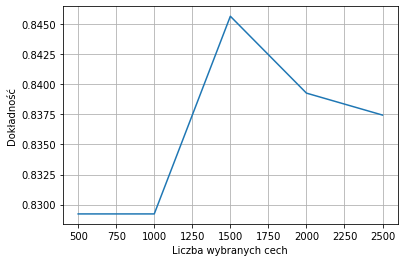

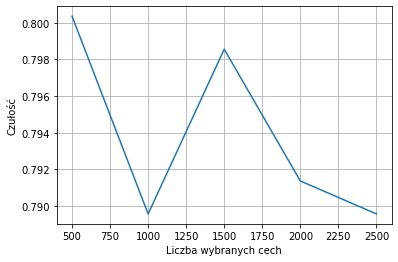

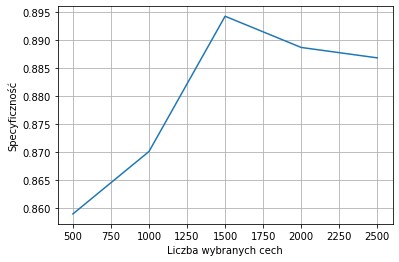

In [10]:
all_scores_MultinomialNB = []
all_specifity_MultinomialNB = []
all_recall_MultinomialNB = []
all_classif_times_MultinomialNB = []
score_best_MultinomialNB = 0
specifity_best_MultinomialNB = 0
recall_best_MultinomialNB = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating MultinomialNB model for {count} selector with {X_test_new.shape[1]} features")
    
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    model = GridSearchCV(MultinomialNB(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_MultinomialNB.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_MultinomialNB.append(score)
    all_specifity_MultinomialNB.append(specificity)
    all_recall_MultinomialNB.append(recall)

    if score > score_best_MultinomialNB:
        score_best_MultinomialNB = score
        specifity_best_MultinomialNB = specificity
        recall_best_MultinomialNB = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_MultinomialNB = model
        best_features_MultinomialNB = sel


print(f"Best k is {k_best} with score {score_best_MultinomialNB}, recall {recall_best_MultinomialNB} and specifity {specifity_best_MultinomialNB}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3> SVC </h3>

> Training and evaluating SVC model for 1 selector with 500 features
0.5787159999999858
> Training and evaluating SVC model for 2 selector with 1000 features
0.9886100999999599
> Training and evaluating SVC model for 3 selector with 1500 features
2.8316996999999446
> Training and evaluating SVC model for 4 selector with 2000 features
3.3564010999998573
> Training and evaluating SVC model for 5 selector with 2500 features
4.505615300000045
Best k is 2000 with score 0.8639269406392694, recall 0.8399280575539568 and specifity 0.8886827458256029
              precision    recall  f1-score   support

       False       0.84      0.89      0.87       539
        True       0.89      0.84      0.86       556

    accuracy                           0.86      1095
   macro avg       0.86      0.86      0.86      1095
weighted avg       0.87      0.86      0.86      1095

[[479  60]
 [ 89 467]]


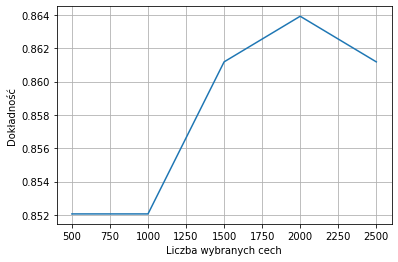

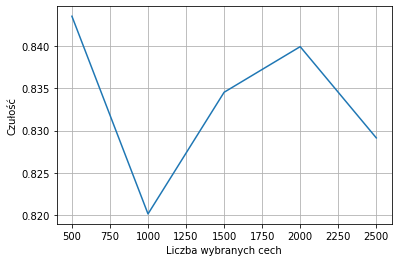

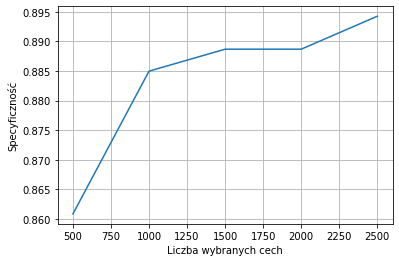

In [11]:
all_scores_SVC = []
all_specifity_SVC = []
all_recall_SVC = []
all_classif_times_SVC = []
score_best_SVC = 0
specifity_best_SVC = 0
recall_best_SVC = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating SVC model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001]}

    model = GridSearchCV(SVC(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_SVC.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_SVC.append(score)
    all_specifity_SVC.append(specificity)
    all_recall_SVC.append(recall)

    if score > score_best_SVC:
        score_best_SVC = score
        specifity_best_SVC = specificity
        recall_best_SVC = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_SVC = model
        best_features_SVC = sel


print(f"Best k is {k_best} with score {score_best_SVC}, recall {recall_best_SVC} and specifity {specifity_best_SVC}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3> LogisticRegression </h3>

> Training and evaluating LogisticRegression model for 1 selector with 500 features
0.0011054000000285669
> Training and evaluating LogisticRegression model for 2 selector with 1000 features
0.0021517999999787207
> Training and evaluating LogisticRegression model for 3 selector with 1500 features
0.0038956999999300024
> Training and evaluating LogisticRegression model for 4 selector with 2000 features
0.0036544000000731103
> Training and evaluating LogisticRegression model for 5 selector with 2500 features
0.011519099999986793
Best k is 2000 with score 0.8712328767123287, recall 0.8597122302158273 and specifity 0.8831168831168831
              precision    recall  f1-score   support

       False       0.86      0.88      0.87       539
        True       0.88      0.86      0.87       556

    accuracy                           0.87      1095
   macro avg       0.87      0.87      0.87      1095
weighted avg       0.87      0.87      0.87      1095

[[476  63]
 [ 78 478]]


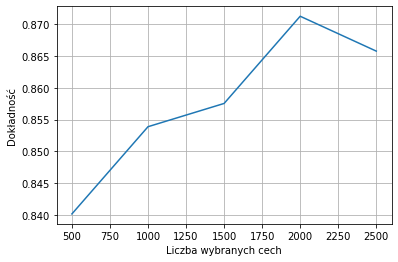

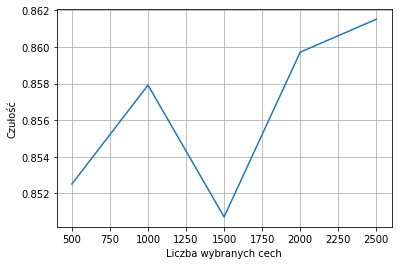

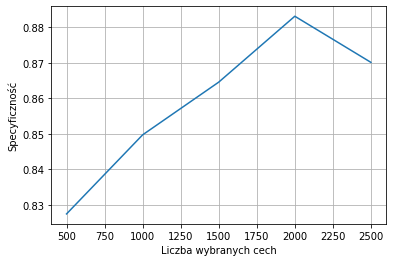

In [9]:
all_scores_LogisticRegression = []
all_specifity_LogisticRegression = []
all_recall_LogisticRegression = []
all_classif_times_LogisticRegression = []
score_best_LogisticRegression = 0
specifity_best_LogisticRegression = 0
recall_best_LogisticRegression = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating LogisticRegression model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2', 'elasticnet']}

    model = GridSearchCV(LogisticRegression(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_LogisticRegression.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_LogisticRegression.append(score)
    all_specifity_LogisticRegression.append(specificity)
    all_recall_LogisticRegression.append(recall)

    if score > score_best_LogisticRegression:
        score_best_LogisticRegression = score
        specifity_best_LogisticRegression = specificity
        recall_best_LogisticRegression = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_LogisticRegression = model
        best_features_LogisticRegression = sel


print(f"Best k is {k_best} with score {score_best_LogisticRegression}, recall {recall_best_LogisticRegression} and specifity {specifity_best_LogisticRegression}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

In [10]:
import pickle

pickle.dump(best_model_LogisticRegression, open('best_model.joblib', 'wb'))
pickle.dump(best_features_LogisticRegression, open('get_features.joblib', 'wb'))
pickle.dump(vectorizer, open('vectorizer.joblib', 'wb'))

<h3>RandomForestClassifier</h3>

> Training and evaluating RandomForestClassifier model for 1 selector with 500 features
0.11096059999999852
> Training and evaluating RandomForestClassifier model for 2 selector with 1000 features
0.08484230000021853
> Training and evaluating RandomForestClassifier model for 3 selector with 1500 features
0.07001420000005965
> Training and evaluating RandomForestClassifier model for 4 selector with 2000 features
0.18924550000019735
> Training and evaluating RandomForestClassifier model for 5 selector with 2500 features
0.3618911999997181
Best k is 2000 with score 0.821917808219178, recall 0.85431654676259 and specifity 0.7884972170686456
              precision    recall  f1-score   support

       False       0.84      0.79      0.81       539
        True       0.81      0.85      0.83       556

    accuracy                           0.82      1095
   macro avg       0.82      0.82      0.82      1095
weighted avg       0.82      0.82      0.82      1095

[[425 114]
 [ 81 475]]


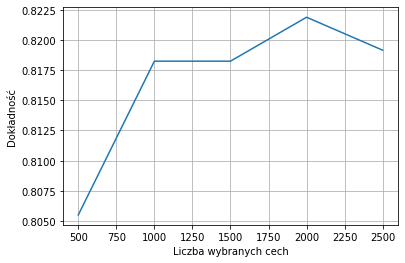

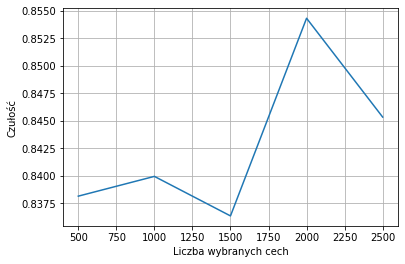

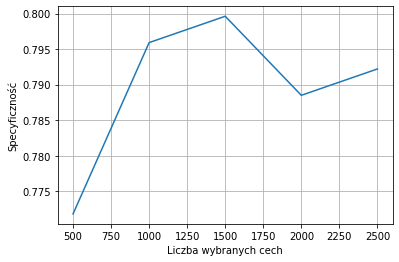

In [13]:
all_scores_RandomForestClassifier = []
all_specifity_RandomForestClassifier = []
all_recall_RandomForestClassifier = []
all_classif_times_RandomForestClassifier = []
score_best_RandomForestClassifier = 0
specifity_best_RandomForestClassifier = 0
recall_best_RandomForestClassifier = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating RandomForestClassifier model for {count} selector with {X_test_new.shape[1]} features")
    param_grid = {'n_estimators': [100, 200, 400, 600]}

    model = GridSearchCV(RandomForestClassifier(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_RandomForestClassifier.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_RandomForestClassifier.append(score)
    all_specifity_RandomForestClassifier.append(specificity)
    all_recall_RandomForestClassifier.append(recall)

    if score > score_best_RandomForestClassifier:
        score_best_RandomForestClassifier = score
        specifity_best_RandomForestClassifier = specificity
        recall_best_RandomForestClassifier = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_RandomForestClassifier = model
        best_features_RandomForestClassifier = sel


print(f"Best k is {k_best} with score {score_best_RandomForestClassifier}, recall {recall_best_RandomForestClassifier} and specifity {specifity_best_RandomForestClassifier}")
print(class_best)
print(conf_best)
plt.plot(all_k, all_scores_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_recall_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_k, all_specifity_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


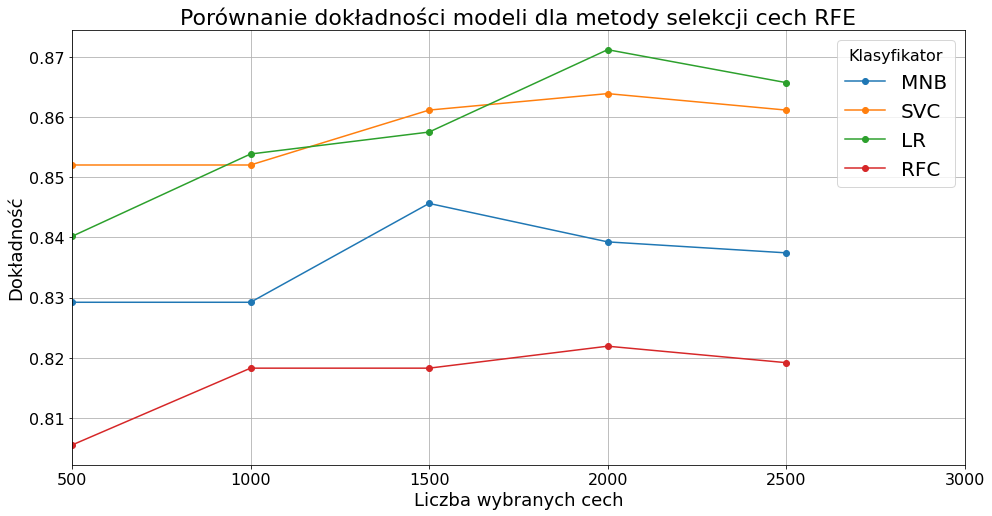

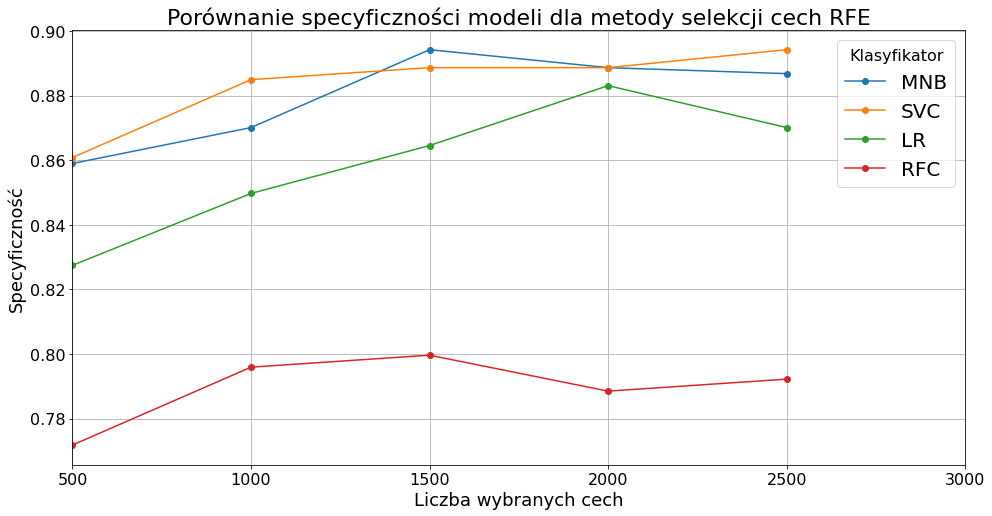

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


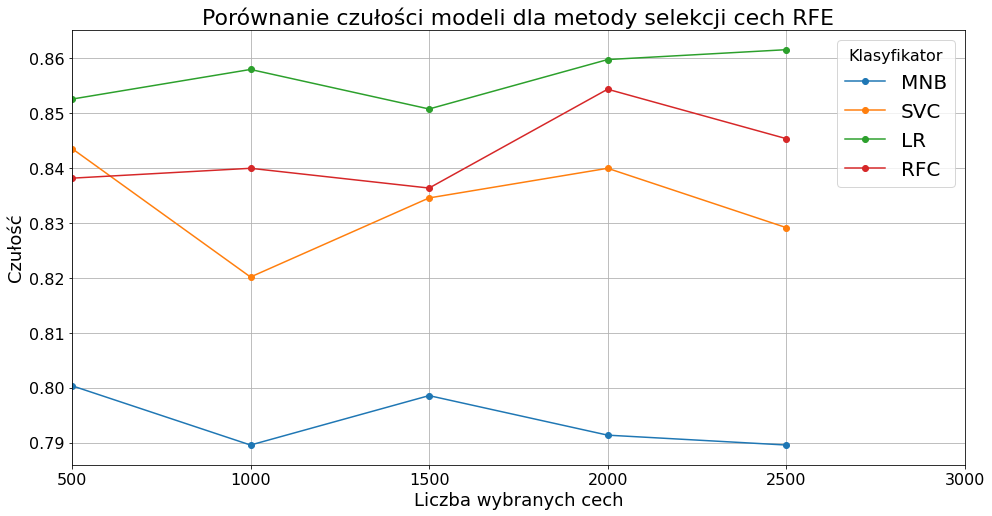

In [17]:
plt.figure(figsize=(16, 8))

plt.plot(all_k, all_scores_MultinomialNB, '-o')
plt.plot(all_k, all_scores_SVC, '-o')
plt.plot(all_k, all_scores_LogisticRegression, '-o')
plt.plot(all_k, all_scores_RandomForestClassifier, '-o')

plt.xlim(500, 3000)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":20}, title="Klasyfikator", title_fontsize=16)
plt.xlabel("Liczba wybranych cech", fontsize=18)
plt.ylabel("Dokładność", fontsize=18)
plt.title("Porównanie dokładności modeli dla metody selekcji cech RFE", fontsize=22)
plt.grid()
plt.tick_params(axis='both', labelsize=16)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\rfe_accuracy.eps', format='eps', dpi=1200)

plt.figure(figsize=(16, 8))

plt.plot(all_k, all_specifity_MultinomialNB, '-o')
plt.plot(all_k, all_specifity_SVC, '-o')
plt.plot(all_k, all_specifity_LogisticRegression, '-o')
plt.plot(all_k, all_specifity_RandomForestClassifier, '-o')

plt.xlim(500, 3000)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":20}, title="Klasyfikator", title_fontsize=16)
plt.xlabel("Liczba wybranych cech", fontsize=18)
plt.ylabel("Specyficzność", fontsize=18)
plt.title("Porównanie specyficzności modeli dla metody selekcji cech RFE", fontsize=22)
plt.grid()
plt.tick_params(axis='both', labelsize=16)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\rfe_specifity.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(16, 8))

plt.plot(all_k, all_recall_MultinomialNB, '-o')
plt.plot(all_k, all_recall_SVC, '-o')
plt.plot(all_k, all_recall_LogisticRegression, '-o')
plt.plot(all_k, all_recall_RandomForestClassifier, '-o')

plt.xlim(500, 3000)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":20}, title="Klasyfikator", title_fontsize=16)
plt.xlabel("Liczba wybranych cech", fontsize=18)
plt.ylabel("Czułość", fontsize=18)
plt.title("Porównanie czułości modeli dla metody selekcji cech RFE", fontsize=22)
plt.grid()
plt.tick_params(axis='both', labelsize=16)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\rfe_recall.eps', format='eps', dpi=1200)
plt.show()

In [19]:
pd.DataFrame(np.array([all_classif_times_MultinomialNB, all_classif_times_SVC, all_classif_times_LogisticRegression, all_classif_times_RandomForestClassifier]), index=["MNB", "SVC", "LR", "RFC"], columns=all_k)

,500,1000,1500,2000,2500
MNB,0.001343,0.002950,0.004465,0.004413,0.005387
SVC,0.578716,0.988610,2.831700,3.356401,4.505615
LR,0.001118,0.002400,0.003686,0.006403,0.006056
RFC,0.110961,0.084842,0.070014,0.189246,0.361891
